## Lighthouse Labs
### W03D03 Data Preparation & Feature Engineering

Instructor: Socorro Dominguez  
November 10, 2021  
[Notes](https://downgit.github.io/#/home?url=https://github.com/sedv8808/LighthouseLabs/tree/main/W03D3)

## Agenda
  
1. Machine Learning Workflow
  
  
2.  Data Preparation
    - Outlier detection
    - Null values
    - Variable transformation 

  
3. Feature Engineering

## Machine Learning Workflow

<img src='imgs/data-science-explore.png' width=800>

- Iterative process
- Non-linear process
- Lots of judgement and refining along the way
- Lots of time spent in data prep
- "Big data": a lot of time can be spent in data retrieval

Source: Practical Machine Learning with Python, Apress/Springer

## Machine Learning Workflow

<img src='imgs/data-science-explore.png' width=600>

### Data Retrieval
- SQL, APIs, Web Scraping, csv, Excel...
- Could include combining some of the above
- Also called "Data Ingestion"

## Machine Learning Workflow

<img src='imgs/data-science-explore.png' width=600>

### Data Preparation
- **Processing and Wrangling**: You became `pandas` experts last week.
- **Feature extraction and engineering**: Will go over this today. What features (i.e., variables, `x`) do I need for my problem?
- **Feature selection**: To be covered later.

## Machine Learning Workflow

<img src='imgs/data-science-explore.png' width=600>

### Modeling (i.e., machine learning)
- `scikit-learn` being the main basic package for:
    - Supervised vs. Unsupervised Learning
- `keras` or `pytorch` for:
    - Deep Learning

- "Build a model"

## Machine Learning Workflow

<img src='imgs/data-science-explore.png' width=600>

### Machine Learning Algorithm
- **"Algorithm"**: series of steps based on rules that a computer takes to calculate something
- Within supervised:
    - Regression: `y` is a continuous number (e.g., price)
    - Classification: `y` is discrete (e.g., customer retained or not)
- Examples: Decision Trees, Linear Regression, Neural Networks
    

## Machine Learning Workflow

<img src='imgs/data-science-explore.png' width=600>

### Model Evaluation & Tuning
- Our first model will probably not be the best model; need to pick
- **Evaluation**: Using metrics to pick the best model for the use case
- **Tuning**: Besides picking between algorithms, there are 'knobs' / settings to 'tune' a model for a specific algorithm

## Machine Learning Workflow

<img src='imgs/data-science-explore.png' width=600>

### Deployment & Monitoring
- We picked a model and it's ready for use by our users
- Be careful about concept drift
- Models sometimes need to be re-trained

## Types of Questions


| Type of question | Description | Example |
|:---|:--------------------------|:----------------|
| **Descriptive** | Summarize a characteristic of a set of data| Proportion of males, the mean number of servings of fresh fruits and vegetables per day |
| **Exploratory** | Analyze the data to see if there are patterns, trends, or relationships between variables; “hypothesis-generating” analyses|If you had a general thought that diet was linked somehow to viral illnesses, start by examining relationships between a range of dietary factors and viral illnesses|
| **Inferential** | Testing a hypothesis, statistically |Analyzing data for a subset / sample of the population and generalizing insights for the general population; Is there a higher incidence of cancer for women than for men?|
| **Predictive**  | Predicting a value, not necessarily figuring out why| Predicting cancer diagnosis from x-rays using computer vision|
| **Causal**      | Whether changing one factor will change another factor | Does changing diet lead to higher incidence of cancer?|
| **Mechanistic** | Understanding *how* one factor changes another | How does diet lead to higher incidence of cancer? |

## Data Preparation

- **Goal**: Preparing data for answering an exploratory, inferential or predictive questions (making sure that the data is in good shape).



- Common techniques:
    * Outlier detection
    *  Null values
    *  Variable transformation

## Outlier Detection and Handling Outliers

- Data is not always right
- Could be human error, could be system error
- **Outlier**: an observation point that is distant from other observations
- Helpful to pointing us what can be wrong
- **Some errors are obvious; many require interviewing the domain experts to figure them out**

Note: Before deleting outliers ask yourself if this is needed, is the outlier nessecarry. It depends on your use case, your business problem, where outliers may be important. An example is fraud detection. 

### Outlier Detection: demo

Kaggle Diabetes Dataset 
- [Docs](https://www.kaggle.com/c/competicao-dsa-machine-learning-jan-2019/overview)  

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
import numpy as np

In [2]:
diabetes_df = pd.read_csv('data/diabetes.csv')
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Method 1: Summary of the data

- Use your intuition
- Ask a domain expert

In [3]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Method 2: Visualizing a Single Variable

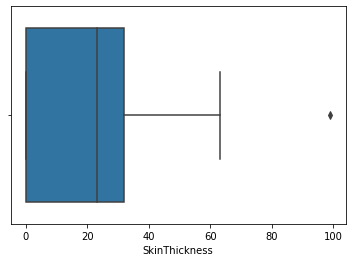

In [4]:
sns.boxplot(x=diabetes_df['SkinThickness']);
plt.show()

### Method 3: Visualizing Multi-Variables

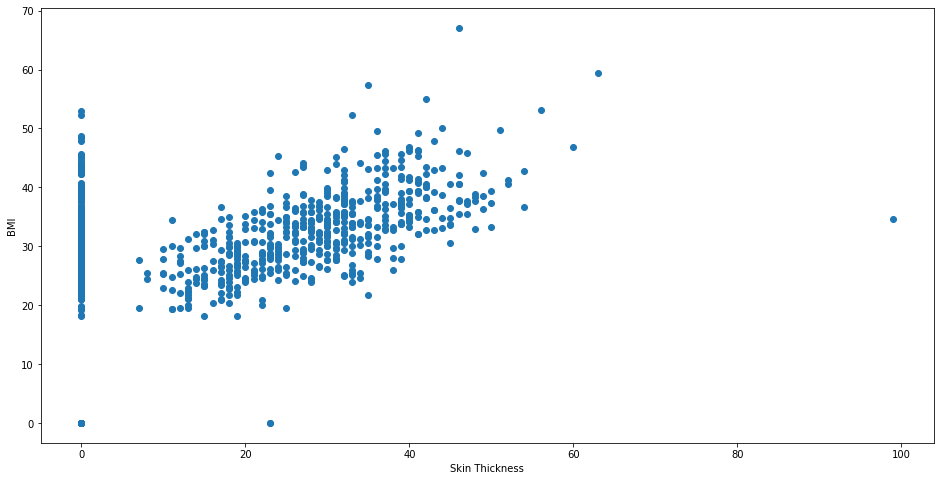

In [5]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(diabetes_df['SkinThickness'], diabetes_df['BMI'])
ax.set_xlabel('Skin Thickness')
ax.set_ylabel('BMI')
plt.show()

### Method 4: Z-Score

A way to detect outliers is to remove values with a z-score greater than 3. The z-score is measured in terms of standard deviations from the mean.

- Z-score of 0 indicates the value is the mean
- Z-score of 1 indicates the value is within 1 standard deviation from the mean. 
- Z-score of 2 indicates the value is within 2 standard deviations from the mean.
- Z-score of 3 indicates the value is within 3 standard deviations from the mean.
- **Z-score of above 3 indicates the value is greater than 3 standard deviations from the mean. Data Scinetist often label values with a z-score above 3 as outliers.**

In [6]:


# Finding Z Score on Column
#stats.zscore(diabetes_df['SkinThickness'])

# Turning Absolute
#(np.abs(stats.zscore(diabetes_df['SkinThickness'])) > 3)

### Outlier detection

**Solution:**
- Can replace the outlier if needed `df.replace`
- Can drop the record
- Can leave the record if deemed necessary

NOTE: Removing outliers is legitimate only for specific reasons.

### Handling Outliers

* Outliers can be very informative about the subject-area and data collection process. 

* It’s essential to understand how outliers occur and whether they might happen again as a normal part of the process or study area. 

* Unfortunately, resisting the temptation to remove outliers inappropriately can be difficult. Outliers increase the variability in your data, which decreases statistical power. Excluding outliers can cause your results to become statistically significant.

### When to remove outliers?

The proper action depends on what causes the outliers.

* Data Entry and Measurement Errors and Outliers
    * Example: Height of a person is 19.0m rather than 1.90m
    * Easy cases to understand errors. 
    * Correct the value if possible. Otherwise, remove.

* Sampling Problems
    * Inferential statistics use samples to draw conclusions about a specific population. 
    * Define a population -> draw a random sample from it specifically
    * You might accidentally obtain an item/person that is not from the target population. 
    * **If you can establish that an item does not represent your target population, you can remove that data point.**
    * **You must be able to attribute a specific reason for why that sample does not fit your target population.**


### When to NOT remove outliers?

* Natural Variation 
    * All data distributions have a spread of values. 
    * Extreme values CAN occur with lower probabilities. 
    * If your sample size is large enough, you’re bound to obtain unusual values. 
    * In a normal distribution, approximately 1 in 340 observations will be at least three standard deviations away from the mean. 
    * There’s nothing wrong with these data points. They’re unusual, but they are a normal part of the data distribution.
    
**It’s bad practice to remove data points simply to produce a better fitting model or statistically significant results.**

### Statistical Analyses that Can Handle Outliers

* Nonparametric hypothesis tests 
  
* For regression analysis: transform your data or use a robust regression analysis
  
* Bootstrapping techniques don’t make assumptions about distributions.

## Data Preparation: Null values

- Sometimes values will be blank in your data
- It could be an error; it could be the data was not available
- There are some techniques to deal with it; all of them are imperfect
- These techniques should be employed only if you can't correct the data

Resource: https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/


### Null values: Demo
- Dataset: https://www.kaggle.com/uciml/pima-indians-diabetes-database/data#

In [7]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Null values: Summary of the data
- Sometimes null values aren't exactly NaNs
- They are encoded as -1 or 9999 etc.
- Sometimes it's 0. 
- Does 0 make sense for some of these categories??

In [8]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Null values: Encoding true NaNs as NaNs
- Won't be used in summary calculations (e.g., average, count)
- Some columns have a lot of what we think could be missing values

In [9]:
cols_missing_vals = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'] # cols with missing values
(diabetes_df[cols_missing_vals] == 0).sum() # count number of 0s

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [10]:
diabetes_df[cols_missing_vals] = diabetes_df[cols_missing_vals].replace(0, np.NaN) # replace 0's with NaNs
diabetes_df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

### Null values: Removing rows with missing values
- Could be a good idea if there aren't too many records removed
- Let's do this for Glucose and BMI columns

In [11]:
print("Shape before dropping NAs", diabetes_df.shape)

diabetes_df = diabetes_df.dropna(subset=['Glucose', 'BMI']) # drop rows with Glucose and BMI as NaN

print("Shape after dropping NAs for Glucose and BMI columns", diabetes_df.shape)

Shape before dropping NAs (768, 9)
Shape after dropping NAs for Glucose and BMI columns (752, 9)


### Null values: Using the average

* Depending on the data, you are able to choose other metrics.

In [12]:
# Fill in missing values with the average
#diabetes_df['SkinThickness'].fillna(value=diabetes_df['SkinThickness'].mean(), inplace=True)

diabetes_df = diabetes_df.assign(SkinThickness = diabetes_df['SkinThickness'].fillna(value=diabetes_df['SkinThickness'].mean()))
diabetes_df.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                28
SkinThickness                 0
Insulin                     360
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

## Data Preparation: Variable Transformation

- Basic transformations (e.g., logarithmic)
- Binning (e.g., grouping numbers into bins)
- Scaling (e.g., setting everything between 0 and 1)
- Dummy variables (e.g., turning categories into multiple columns of binary variables)

Will learn more when we get into `scikit-learn` library and dive into unsupervised and supervised learning.

## Feature Engineering

<blockquote>
Feature engineering is the process of transforming raw data into features that better represent the underlying problem to the predictive models, resulting in improved model accuracy on unseen data.<br> 
- Jason Brownlee    
</blockquote>    


> If your features are bad, whatever fancier model you build is not going to help.  
> \- Pedro Domingos  
[A Few Useful Things to Know About Machine Learning](https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf)


## Feature Engineering


> ... At the end of the day, some machine learning projects succeed and some fail. What makes the difference? Easily the most important factor is the features used.   
> \- Andrew Ng
> [Machine Learning and AI via Brain simulations](https://ai.stanford.edu/~ang/slides/DeepLearning-Mar2013.pptx)

> Coming up with features is difficult, time-consuming, requires expert knowledge. "Applied machine learning" is basically feature engineering.  

  
> Better features: more flexibility, we can get by with simple models, better accuracy 

## Feature Engineering

#### Better features usually help more than a better model.
- Good features would ideally:
    - capture most important aspects of the problem
    - allow learning with few examples 
    - generalize to new scenarios.
    
    
#### The best features may be dependent on the model you use.

#### The best features are very domain and problem specific.

### Feature Engineering: Examples

**Example 1:** Taking a date and extracting out the week number, weekday, month etc. 

Sales is often based on seasonality.

### Feature Engineering: Examples

**Example 2:** Taking freeform text (e.g., tweets) and extracting number of words, counts of words, punctuation etc.

Text "metadata" can sometimes help with sentiment analysis.

### Feature Engineering: Examples


**Example 3:** Taking geographical coordinates and getting continent, country, urban vs. rural etc.

Housing price can depend on features extracted from geographical coordinates; coordinates aren't that useful themselves.

**Feature Engineering vs. Feature Selection**

Through feature engineering we usually add more features to our data to make it more complex. 

In Feature selection, we are trying to choose the best features and remove features that do not add anything to our model. One common method is to remove features that have a low variance. 

We will talk more about this next week.